In [4]:
# Import required libraries
import pandas as pd
import os

# File paths
machine_measurements_path = "machine_measurements.csv"  # Update with your file's location
record_list_path = "record_list.csv"                   # Update with your file's location
data_dictionary_path = "machine_measurements_data_dictionary.csv"  # Update with your file's location

# Load CSV files
machine_measurements = pd.read_csv(machine_measurements_path)
record_list = pd.read_csv(record_list_path)

# Display basic information about the datasets
print("Machine Measurements Dataset:")
display(machine_measurements.info())
display(machine_measurements.head())

print("\nRecord List Dataset:")
display(record_list.info())
display(record_list.head())


C:\Users\MR. VASKAR CHAKMA\AppData\Local\Temp\ipykernel_7680\3709128709.py:11: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  machine_measurements = pd.read_csv(machine_measurements_path)


Machine Measurements Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800035 entries, 0 to 800034
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   subject_id   800035 non-null  int64 
 1   study_id     800035 non-null  int64 
 2   cart_id      800035 non-null  int64 
 3   ecg_time     800035 non-null  object
 4   report_0     800034 non-null  object
 5   report_1     601108 non-null  object
 6   report_2     525908 non-null  object
 7   report_3     393551 non-null  object
 8   report_4     227550 non-null  object
 9   report_5     122212 non-null  object
 10  report_6     56125 non-null   object
 11  report_7     22370 non-null   object
 12  report_8     7261 non-null    object
 13  report_9     2328 non-null    object
 14  report_10    898 non-null     object
 15  report_11    401 non-null     object
 16  report_12    193 non-null     object
 17  report_13    103 non-null     object
 18  report_14    4

None

,subject_id,study_id,cart_id,ecg_time,report_0,report_1,report_2,report_3,report_4,report_5,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
0,10000032,40689238,6848296,2180-07-23 08:44:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,60 Hz notch Baseline filter,659,40,128,170,258,518,81,77,79
1,10000032,44458630,6848296,2180-07-23 09:54:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,60 Hz notch Baseline filter,722,40,124,162,246,504,77,75,70
2,10000032,49036311,6376932,2180-08-06 09:07:00,Sinus tachycardia,NaN,Normal ECG except for rate,NaN,NaN,NaN,...,60 Hz notch Baseline filter,600,40,130,162,244,474,79,72,77
3,10000117,45090959,6214760,2181-03-04 17:14:00,Sinus rhythm,NaN,Normal ECG,NaN,NaN,NaN,...,60 Hz notch Baseline filter,659,40,146,180,254,538,79,66,69
4,10000117,48446569,6632385,2183-09-18 13:52:00,Sinus rhythm,NaN,NaN,NaN,NaN,NaN,...,<not specified>,659,368,29999,504,590,868,84,80,77



Record List Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800035 entries, 0 to 800034
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   subject_id  800035 non-null  int64 
 1   study_id    800035 non-null  int64 
 2   file_name   800035 non-null  int64 
 3   ecg_time    800035 non-null  object
 4   path        800035 non-null  object
dtypes: int64(3), object(2)
memory usage: 30.5+ MB


None

,subject_id,study_id,file_name,ecg_time,path
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630
2,10000032,49036311,49036311,2180-08-06 09:07:00,files/p1000/p10000032/s49036311/49036311
3,10000117,45090959,45090959,2181-03-04 17:14:00,files/p1000/p10000117/s45090959/45090959
4,10000117,48446569,48446569,2183-09-18 13:52:00,files/p1000/p10000117/s48446569/48446569


In [14]:
# Convert ecg_time to datetime format
machine_measurements['ecg_time'] = pd.to_datetime(machine_measurements['ecg_time'], errors='coerce')
record_list['ecg_time'] = pd.to_datetime(record_list['ecg_time'], errors='coerce')

# Check for missing values
print("\nMissing values in Machine Measurements:")
display(machine_measurements.isnull().sum())

print("\nMissing values in Record List:")
display(record_list.isnull().sum())

# Check if paths in record_list exist
record_list['path_exists'] = record_list['path'].apply(lambda x: os.path.exists(x))
missing_paths = record_list[~record_list['path_exists']]

# Report missing paths, if any
if not missing_paths.empty:
    print("\nMissing paths in Record List:")
    display(missing_paths)
else:
    print("\nAll file paths in Record List exist.")



Missing values in Machine Measurements:


subject_id          0
study_id            0
cart_id             0
ecg_time            0
report_0            1
report_1       198927
report_2       274127
report_3       406484
report_4       572485
report_5       677823
report_6       743910
report_7       777665
report_8       792774
report_9       797707
report_10      799137
report_11      799634
report_12      799842
report_13      799932
report_14      799993
report_15      800016
report_16      800024
report_17      800032
bandwidth           0
filtering           0
rr_interval         0
p_onset             0
p_end               0
qrs_onset           0
qrs_end             0
t_end               0
p_axis              0
qrs_axis            0
t_axis              0
dtype: int64


Missing values in Record List:


subject_id     0
study_id       0
file_name      0
ecg_time       0
path           0
path_exists    0
dtype: int64


Missing paths in Record List:


,subject_id,study_id,file_name,ecg_time,path,path_exists
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238,False
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630,False
2,10000032,49036311,49036311,2180-08-06 09:07:00,files/p1000/p10000032/s49036311/49036311,False
3,10000117,45090959,45090959,2181-03-04 17:14:00,files/p1000/p10000117/s45090959/45090959,False
4,10000117,48446569,48446569,2183-09-18 13:52:00,files/p1000/p10000117/s48446569/48446569,False
...,...,...,...,...,...,...
800030,19999840,48683947,48683947,2164-09-12 12:28:00,files/p1999/p19999840/s48683947/48683947,False
800031,19999840,41842293,41842293,2164-09-17 11:31:00,files/p1999/p19999840/s41842293/41842293,False
800032,19999987,41190887,41190887,2145-11-02 19:54:00,files/p1999/p19999987/s41190887/41190887,False
800033,19999987,45828463,45828463,2145-11-03 03:00:00,files/p1999/p19999987/s45828463/45828463,False


In [13]:
# Merge machine_measurements and record_list on subject_id, study_id, and ecg_time
merged_data = pd.merge(
    record_list,
    machine_measurements,
    on=['subject_id', 'study_id', 'ecg_time'],
    how='inner'
)

# Display information and preview merged data
print("Merged Dataset Info:")
display(merged_data.info())
display(merged_data.head())

# Save merged dataset
merged_output_path = "merged_ecg_data.csv"  # Output file path
merged_data.to_csv(merged_output_path, index=False)
print(f"Merged dataset saved to {merged_output_path}")


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782185 entries, 0 to 782184
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   subject_id   782185 non-null  int64         
 1   study_id     782185 non-null  int64         
 2   file_name    782185 non-null  int64         
 3   ecg_time     782185 non-null  datetime64[ns]
 4   path         782185 non-null  object        
 5   path_exists  782185 non-null  bool          
 6   cart_id      782185 non-null  int64         
 7   report_0     782184 non-null  object        
 8   report_1     587755 non-null  object        
 9   report_2     514119 non-null  object        
 10  report_3     384746 non-null  object        
 11  report_4     222511 non-null  object        
 12  report_5     119528 non-null  object        
 13  report_6     54903 non-null   object        
 14  report_7     21843 non-null   object        
 15  report_8     

None

,subject_id,study_id,file_name,ecg_time,path,path_exists,cart_id,report_0,report_1,report_2,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238,False,6848296,Sinus rhythm,Possible right atrial abnormality,NaN,...,60 Hz notch Baseline filter,659,40,128,170,258,518,81,77,79
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630,False,6848296,Sinus rhythm,Possible right atrial abnormality,NaN,...,60 Hz notch Baseline filter,722,40,124,162,246,504,77,75,70
2,10000032,49036311,49036311,2180-08-06 09:07:00,files/p1000/p10000032/s49036311/49036311,False,6376932,Sinus tachycardia,NaN,Normal ECG except for rate,...,60 Hz notch Baseline filter,600,40,130,162,244,474,79,72,77
3,10000117,45090959,45090959,2181-03-04 17:14:00,files/p1000/p10000117/s45090959/45090959,False,6214760,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,659,40,146,180,254,538,79,66,69
4,10000117,48446569,48446569,2183-09-18 13:52:00,files/p1000/p10000117/s48446569/48446569,False,6632385,Sinus rhythm,NaN,NaN,...,<not specified>,659,368,29999,504,590,868,84,80,77


PermissionError: [Errno 13] Permission denied: 'merged_ecg_data.csv'

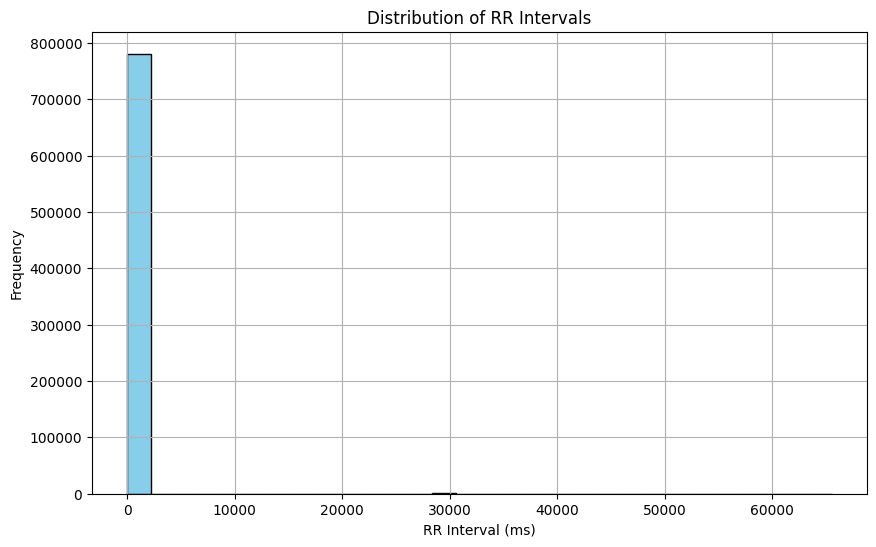

In [8]:
import matplotlib.pyplot as plt

# Plot RR intervals
plt.figure(figsize=(10, 6))
plt.hist(merged_data['rr_interval'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of RR Intervals')
plt.xlabel('RR Interval (ms)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


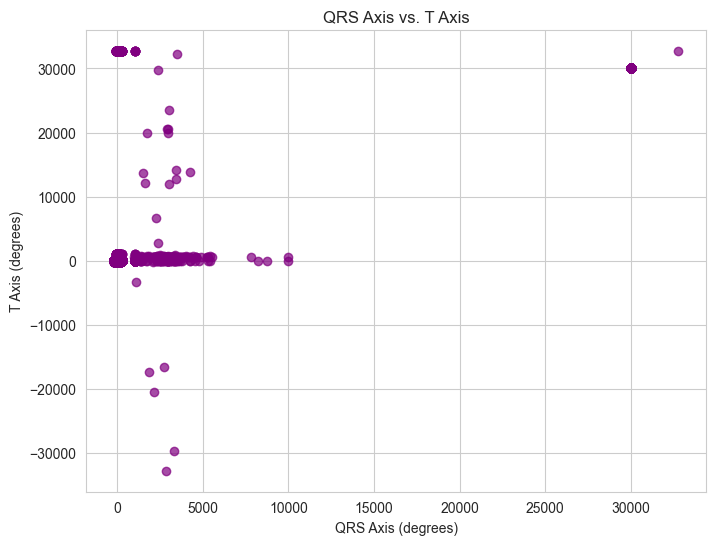

In [12]:
# Scatter plot of QRS vs. T axes
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['qrs_axis'], merged_data['t_axis'], alpha=0.7, color='purple')
plt.title('QRS Axis vs. T Axis')
plt.xlabel('QRS Axis (degrees)')
plt.ylabel('T Axis (degrees)')
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Predicting high/low QRS duration (binary classification)
merged_data['qrs_duration'] = merged_data['qrs_end'] - merged_data['qrs_onset']
merged_data['qrs_class'] = (merged_data['qrs_duration'] > 120).astype(int)  # 1 if QRS > 120 ms, else 0

# Define features and labels
features = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 'p_axis', 'qrs_axis', 't_axis']
X = merged_data[features].dropna()
y = merged_data['qrs_class'].loc[X.index]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("machine_measurements.csv")

# Ensure necessary columns exist
required_columns = ['qrs_onset', 'qrs_end', 'rr_interval', 'p_onset', 'p_end', 'p_axis', 'qrs_axis', 't_axis']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

# Compute QRS duration
df['qrs_duration'] = df['qrs_end'] - df['qrs_onset']

# Encode WCT Labels
df['wct_label'] = np.where(df['qrs_duration'] > 120, 'WCT', 'Normal')

# Apply Label Encoding
label_encoder = LabelEncoder()
df['wct_label_encoded'] = label_encoder.fit_transform(df['wct_label'])

# Select Features and Target Variable
features = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 'p_axis', 'qrs_axis', 't_axis']
X = df[features].dropna()  # Remove NaN rows
y = df.loc[X.index, 'wct_label_encoded']  # Ensure index consistency

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


C:\Users\MR. VASKAR CHAKMA\AppData\Local\Temp\ipykernel_18912\2543807873.py:9: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("machine_measurements.csv")


X_train shape: (640028, 8), X_test shape: (160007, 8)
y_train shape: (640028,), y_test shape: (160007,)


In [15]:
# Load the ECG records file
df_records = pd.read_csv("record_list.csv")

# Ensure necessary columns exist
required_columns_records = ['subject_id', 'study_id', 'file_name', 'ecg_time', 'path']
for col in required_columns_records:
    if col not in df_records.columns:
        raise ValueError(f"Missing column: {col}")

# Merge ECG metadata with machine_measurements.csv based on subject_id and study_id
df_merged = df.merge(df_records, on=['subject_id', 'study_id'], how='left')

# Display merged dataset preview
print(df_merged.head())

# Save merged file for further processing
df_merged.to_csv("merged_ecg_data.csv", index=False)
print("Merged ECG Data Saved Successfully!")


   subject_id  study_id  cart_id           ecg_time_x           report_0  \
0    10000032  40689238  6848296  2180-07-23 08:44:00       Sinus rhythm   
1    10000032  44458630  6848296  2180-07-23 09:54:00       Sinus rhythm   
2    10000032  49036311  6376932  2180-08-06 09:07:00  Sinus tachycardia   
3    10000117  45090959  6214760  2181-03-04 17:14:00       Sinus rhythm   
4    10000117  48446569  6632385  2183-09-18 13:52:00       Sinus rhythm   

                            report_1                    report_2  \
0  Possible right atrial abnormality                         NaN   
1  Possible right atrial abnormality                         NaN   
2                                NaN  Normal ECG except for rate   
3                                NaN                  Normal ECG   
4                                NaN                         NaN   

         report_3 report_4 report_5  ... t_end p_axis qrs_axis t_axis  \
0  Borderline ECG      NaN      NaN  ...   518     81       7

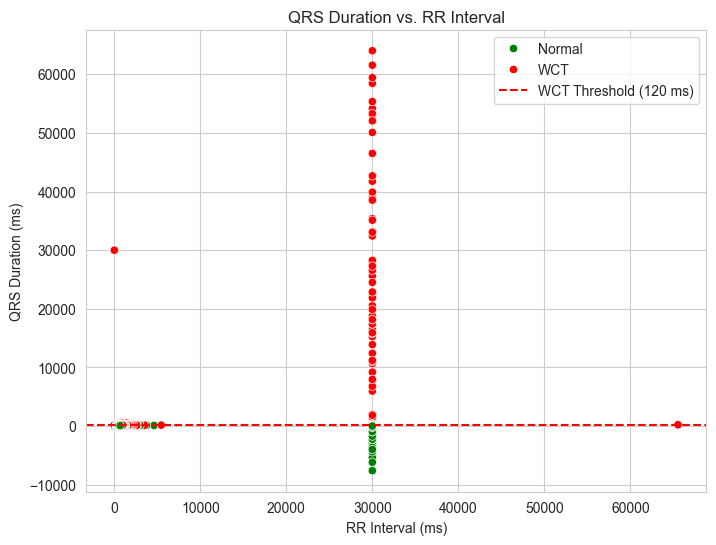

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['rr_interval'], y=df['qrs_duration'], hue=df['wct_label'], palette=['green', 'red'])
plt.xlabel("RR Interval (ms)")
plt.ylabel("QRS Duration (ms)")
plt.title("QRS Duration vs. RR Interval")
plt.axhline(120, color='red', linestyle='--', label="WCT Threshold (120 ms)")
plt.legend()
plt.show()


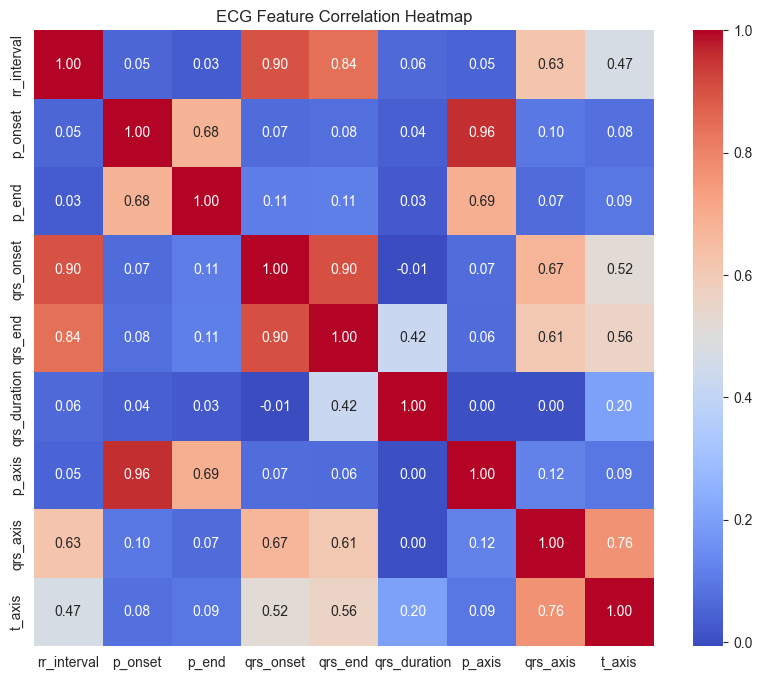

In [17]:
# Select only numeric features
correlation_features = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 'qrs_duration', 'p_axis', 'qrs_axis', 't_axis']
corr_matrix = df[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("ECG Feature Correlation Heatmap")
plt.show()


C:\Users\MR. VASKAR CHAKMA\AppData\Local\Temp\ipykernel_18912\139207884.py:7: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  measurements_df = pd.read_csv('machine_measurements.csv')


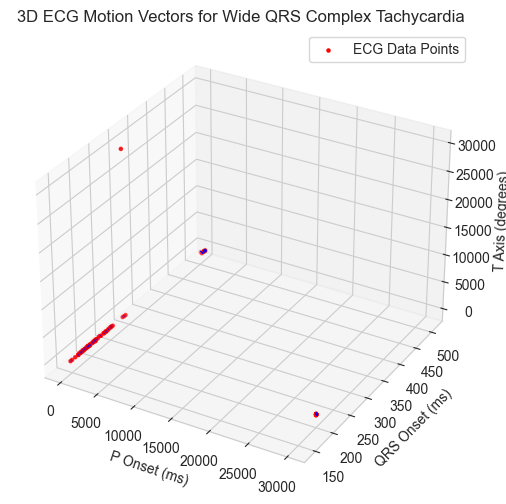

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load CSV Files
measurements_df = pd.read_csv('machine_measurements.csv')
record_list_df = pd.read_csv('record_list.csv')

# Ensure we have only valid numerical data
features = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 'p_axis', 'qrs_axis', 't_axis']
df_filtered = measurements_df.dropna(subset=features)

# Select a subset of data for visualization
num_samples = 100  # Limit to 100 for clear visualization
df_sample = df_filtered.sample(n=num_samples, random_state=42)

# Extract ECG-based motion components
X = df_sample['p_onset'].values  # X-axis (time of P-wave onset)
Y = df_sample['qrs_onset'].values  # Y-axis (time of QRS onset)
Z = df_sample['t_axis'].values  # Z-axis (electrical axis of T-wave)

# Generate motion vectors
U = df_sample['rr_interval'].values / 100  # Normalize for scaling
V = df_sample['p_end'].values / 100
W = df_sample['qrs_axis'].values / 100

# Plot the 3D scatter points and motion vectors
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Red Dots - Representing ECG Data Points
ax.scatter(X, Y, Z, color='red', s=5, label="ECG Data Points")

# Blue Motion Vectors
ax.quiver(X, Y, Z, U, V, W, color='blue', length=2, normalize=True)

# Axis Labels
ax.set_xlabel("P Onset (ms)")
ax.set_ylabel("QRS Onset (ms)")
ax.set_zlabel("T Axis (degrees)")

# Title
ax.set_title("3D ECG Motion Vectors for Wide QRS Complex Tachycardia")

# Show Plot
plt.legend()
plt.show()


C:\Users\MR. VASKAR CHAKMA\AppData\Local\Temp\ipykernel_18912\2048896283.py:8: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  measurements_df = pd.read_csv('machine_measurements.csv')
C:\Users\MR. VASKAR CHAKMA\AppData\Local\Temp\ipykernel_18912\2048896283.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 0.95])


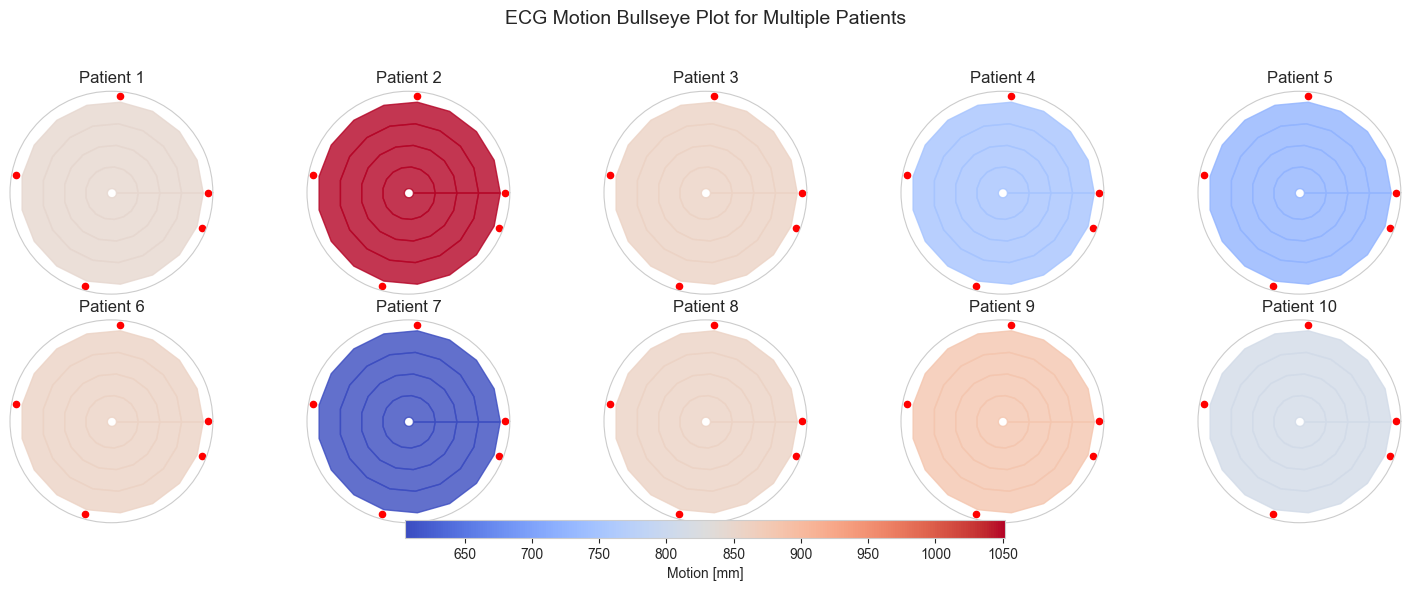

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load CSV Files
measurements_df = pd.read_csv('machine_measurements.csv')
record_list_df = pd.read_csv('record_list.csv')

# Ensure we have only valid numerical data
features = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 'p_axis', 'qrs_axis', 't_axis']
df_filtered = measurements_df.dropna(subset=features)

# Select a subset of data for visualization (e.g., 10 patients)
num_patients = 10
df_sample = df_filtered.sample(n=num_patients, random_state=42)

# Bullseye Plot Configuration
num_segments = 17  # Standard heart segmentation
theta = np.linspace(0, 2 * np.pi, num_segments + 1)
radii = [0.2, 0.4, 0.6, 0.8, 1.0]  # Circular region levels

# Normalize motion data for colormap
motion_values = df_sample['rr_interval'].values
norm = Normalize(vmin=min(motion_values), vmax=max(motion_values))
cmap = cm.coolwarm  # Blue-to-purple colormap

# Create a figure with multiple patient plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'projection': 'polar'})

for i, ax in enumerate(axes.flatten()):
    if i >= num_patients:
        ax.axis('off')
        continue

    # Plot each segment with motion intensity
    for j, radius in enumerate(radii[:-1]):
        ax.fill_between(theta, radius, radii[j+1], color=cmap(norm(motion_values[i])), alpha=0.8)

    # Mark lead tips (red dots)
    ax.scatter(theta[:-1][::4], np.full_like(theta[:-1][::4], 1.05), color='red', s=20)

    # Labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Patient {i+1}', fontsize=12)

# Add Colorbar
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.03])
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', label="Motion [mm]")

# Show Plot
plt.suptitle("ECG Motion Bullseye Plot for Multiple Patients", fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()
